In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("D:\Model all\Machine-Learning\Datasets\customer_churn_dataset-testing-master.csv")

In [4]:
df = pd.read_csv("D:\Model all\Machine-Learning\Datasets\customer_churn_dataset-training-master.csv")

In [5]:
df.dropna(axis = 0, inplace=True)
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [6]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [30]:
df["Contract Length"].value_counts()

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

In [ ]:
df.dtypes 

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [ ]:
df.select_dtypes("object").columns

Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')

In [40]:
category = ['Gender', 'Subscription Type', 'Contract Length']

# Model Preprocessing

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [43]:
encoder = LabelEncoder()

In [47]:
df["Gender"] = encoder.fit_transform(df["Gender"])
df["Subscription Type"] = encoder.fit_transform(df["Subscription Type"])
df["Contract Length"] = encoder.fit_transform(df["Contract Length"])

In [48]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


# using the standard scaller for the Total Spend columna


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaller = StandardScaler()

In [56]:
df["Total Spend"] = scaller.fit_transform(df[["Total Spend"]])

In [59]:
df.drop("CustomerID", axis = 1,inplace = True)

In [73]:
df[["Age", "Tenure", "Usage Frequency","Payment Delay","Last Interaction"]]
newlist = ["Age", "Tenure", "Usage Frequency","Payment Delay","Last Interaction"]

In [76]:
df[newlist] = scaller.fit_transform(df[newlist])

In [77]:
X = df.iloc[:,:-1]

In [78]:
Y = df.iloc[:,-1]

** Traning and testign data sets **

In [67]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state=42, test_size=0.2)

# building the model

In [69]:
from sklearn.linear_model import LogisticRegression

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
Lmodel = LogisticRegression()

In [81]:
Lmodel.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [82]:
Lmodel.score(x_test,y_test)

0.8504769358149875

# Decign Tree Model 

In [84]:
Dmodel = DecisionTreeClassifier()

In [85]:
Dmodel.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [86]:
Dmodel.score(x_test,y_test)

0.9998298683180782

# RandomForest Model

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
Rmodel = RandomForestClassifier()

In [89]:
Rmodel.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
from sklearn.tree import plot_tree

In [93]:
model = Dmodel

In [94]:
model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# model Evaluation 

In [95]:
# Cross validation

In [96]:
from sklearn.model_selection import cross_validate

In [98]:
scores = cross_validate(model,X,Y,cv = 5)

In [99]:
scores

{'fit_time': array([1.36321473, 1.39279008, 1.18750882, 1.12686253, 1.44925499]),
 'score_time': array([0.01753926, 0.01532531, 0.01398158, 0.01428914, 0.01711917]),
 'test_score': array([0.99979584, 0.99984121, 0.99984121, 0.99981852, 0.99988658])}

In [100]:
print(f"Mean Score: {np.mean(scores['test_score']):.4f}")

# Calculate the standard deviation (Stability)
# A low value here means your model is consistent across different data samples
print(f"Score Stability (Std Dev): {np.std(scores['test_score']):.6f}")

Mean Score: 0.9998
Score Stability (Std Dev): 0.000030


In [102]:
# checking the model overfit or underfit

In [104]:
train_sco = model.score(x_train,y_train)
test_sco = model.score(x_test,y_test)

In [107]:
train_sco,test_sco

(1.0, 0.9998298683180782)

In [112]:
train_scores = cross_validate(model,X,Y,cv = 5)
test_scores = cross_validate(model,X,Y,cv = 5 , return_train_score=True)
test_scores

{'fit_time': array([1.13680887, 1.11992717, 1.1270299 , 1.27006698, 1.08544707]),
 'score_time': array([0.01436853, 0.01398396, 0.01666665, 0.0148313 , 0.01357269]),
 'test_score': array([0.9997845 , 0.99984121, 0.99984121, 0.9997845 , 0.99989792]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [115]:
print("Train score average :", test_scores["train_score"].mean())
print("Test score average :", test_scores["test_score"].mean())

Train score average : 1.0
Test score average : 0.9998298672374606


# main model

In [164]:
model = DecisionTreeClassifier(max_depth=5, class_weight='balanced')

In [165]:
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [146]:
trainscore = model.score(x_train,y_train)
testscore = model.score(x_test,y_test)


In [147]:
trainscore,testscore

(0.9548892007996257, 0.9540417616568557)

In [148]:
score_train = cross_validate(model,X,Y, cv = 5, )
score_test = cross_validate(model,X,Y, cv = 5, return_train_score=True)

In [149]:
print("Train Score",score_train["test_score"].mean())
print("Test Score",score_test["test_score"].mean())

Train Score 0.9547015670509167
Test Score 0.9547015670509167


In [150]:
if score_train["test_score"].mean() < score_test["test_score"].mean():
    print(score_test)

# confusion matrix check

In [130]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [151]:
y_pred = model.predict(x_test)

In [156]:
cm = confusion_matrix(y_test,y_pred_new)

In [155]:
y_pred_probs = model.predict_proba(x_test)[:, 1]
y_pred_new = (y_pred_probs > 0.3).astype(int) 

In [157]:
cm

array([[38061,     2],
       [ 4050, 46054]])

<Axes: >

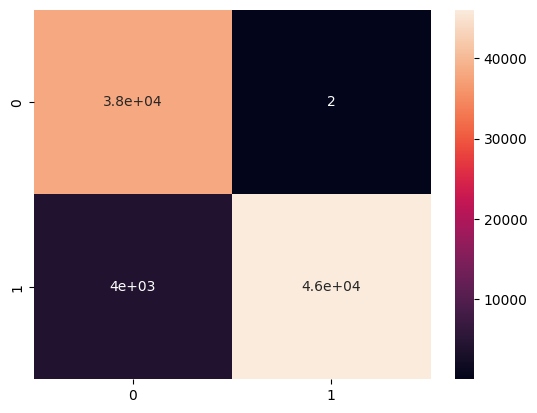

In [143]:
sns.heatmap(cm, annot=True)

In [167]:
y_pred_new = (model.predict_proba(x_test)[:,1] > 0.3).astype(int)

In [168]:
y_pred_new

array([1, 1, 1, ..., 0, 1, 0], shape=(88167,))

In [166]:
from sklearn.metrics import accuracy_score, precision_score,f1_score,recall_score

In [169]:
accuracy_score(y_test,y_pred_new)

0.9540417616568557

In [170]:
precision_score(y_test,y_pred_new)

0.9999565746048289

In [171]:
recall_score(y_test,y_pred_new)

0.9191681302889989

In [172]:
f1_score(y_test,y_pred_new)

0.9578618968386023

In [173]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.9668073810305057


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,-0.753326,0,0.448760,-0.210511,5.0,0.609620,2,0,1.247427,0.293052,1.0
1,2.059646,0,1.028278,-1.724562,10.0,-0.601319,0,1,-0.309865,-0.986584,1.0
2,1.255940,0,-1.000036,-1.375166,6.0,0.609620,0,2,-1.854698,-1.335575,1.0
3,1.497051,1,0.390808,0.604748,7.0,-0.722413,2,1,-0.978462,1.689018,1.0
4,-1.315921,1,0.043097,0.488282,5.0,-0.601319,0,1,-0.060698,0.642043,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,0.211121,1,1.318037,-0.094045,1.0,-1.206788,1,0,0.352005,-0.753923,0.0
440829,-1.155179,0,-1.347747,-0.326976,1.0,0.851808,1,0,0.472436,-1.451906,0.0
440830,-1.074809,1,0.216952,1.303541,1.0,-0.964600,2,2,1.435589,-0.637592,0.0
440831,-0.914068,1,1.375989,-0.210511,2.0,-1.570070,2,2,-0.120706,-1.451906,0.0


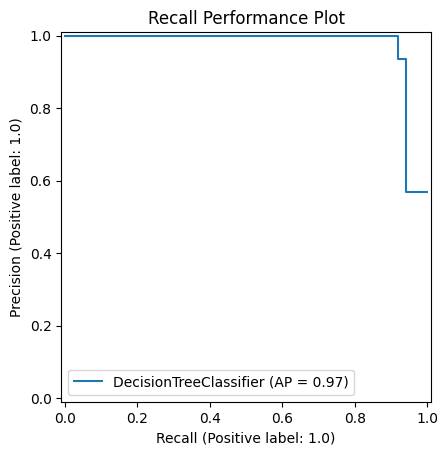

In [176]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

# X_test: your test features, y_test: actual answers, model: your trained ML model
PrecisionRecallDisplay.from_estimator(model, x_test, y_test)
plt.title("Recall Performance Plot")
plt.show()


In [179]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     38063
         1.0       1.00      0.92      0.96     50104

    accuracy                           0.95     88167
   macro avg       0.95      0.96      0.95     88167
weighted avg       0.96      0.95      0.95     88167



### building the Pipelines for the model work good in this 

In [180]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [182]:
DecisionTreeClassifier()

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [188]:
data = {
    "max_depth":[3,5,10],
    "min_samples_split":[2,3,5], 
    "criterion":['gini', 'entropy', 'log_loss']
}

In [192]:
grid_search = GridSearchCV(
    estimator = model,
    param_grid = data,
    cv = 5
)

In [194]:
from sklearn.compose import ColumnTransformer

In [ ]:
preprocessor = ColumnTransformer(
    
)

In [ ]:
df.head() # list1 = 
# list2 = 
# dont do any thing 
# list3 = ["Support Calls", ""]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,-0.753326,0,0.448760,-0.210511,5.0,0.609620,2,0,1.247427,0.293052,1.0
1,2.059646,0,1.028278,-1.724562,10.0,-0.601319,0,1,-0.309865,-0.986584,1.0
2,1.255940,0,-1.000036,-1.375166,6.0,0.609620,0,2,-1.854698,-1.335575,1.0
3,1.497051,1,0.390808,0.604748,7.0,-0.722413,2,1,-0.978462,1.689018,1.0
4,-1.315921,1,0.043097,0.488282,5.0,-0.601319,0,1,-0.060698,0.642043,1.0


In [197]:
category = ["Gender", "Subscription Type", "Contract Length"]
scaller = ["Age","Tenure","Usage Frequency", "Payment Delay", "Total Spend","Last Interaction"]
normal = ["Support Calls"]

In [198]:
preprocesser = ColumnTransformer(
   transformers = [
       ("cat", LabelEncoder(), category),
       ("scaller", StandardScaler(), scaller),
       ("normal", "passthrough",normal)
   ]
)

In [199]:
preprocesser

,transformers,"[('cat', ...), ('scaller', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [201]:
pipe = Pipeline(
    [
        ("preprocess", preprocesser),
        ("model", DecisionTreeClassifier())
    ]
)

In [202]:
pipe

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('scaller', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [203]:
gread_search = GridSearchCV(
    estimator=pipe,
    param_grid=data,
    cv = 5
)

In [205]:
gread_search.fit(X,Y)

ValueError: Invalid parameter 'criterion' for estimator Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', LabelEncoder(),
                                                  ['Gender',
                                                   'Subscription Type',
                                                   'Contract Length']),
                                                 ('scaller', StandardScaler(),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction']),
                                                 ('normal', 'passthrough',
                                                  ['Support Calls'])])),
                ('model', DecisionTreeClassifier())]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].